In [1]:
# Installing cartopy: Method 1
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy
#!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

import warnings
warnings.filterwarnings('ignore')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cud

In [2]:
# # Installing cartopy: Method 2


# !apt-get -V -y -qq install python-cartopy python3-cartopy

# !pip uninstall shapely -y

# !pip install shapely --no-binary shapely

# import cartopy

In [3]:
import cartopy
import matplotlib.pyplot as plt
import pandas as pd

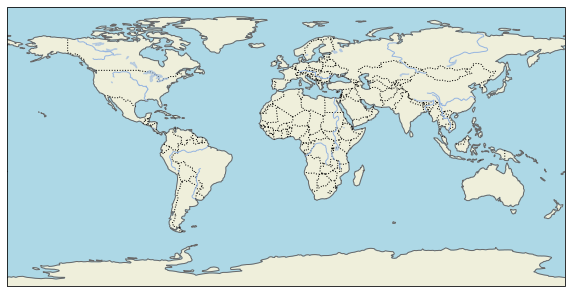

In [4]:
# World map: version 1

plt.figure(figsize=(10,10))
ax = plt.axes(projection=cartopy.crs.PlateCarree())

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN, facecolor='lightblue')
ax.add_feature(cartopy.feature.COASTLINE, edgecolor='dimgray')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)


plt.show()


Using stock_img() option


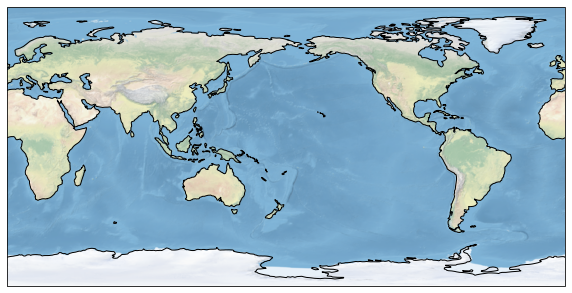

In [5]:
# World map: version 2

print('Using stock_img() option')

plt.figure(figsize=(10,10))
ax = plt.axes(projection=cartopy.crs.PlateCarree(central_longitude=180))
ax.coastlines()
ax.stock_img() # Meaning: add a low-resolution Natural Earth background image to the axes
plt.show()


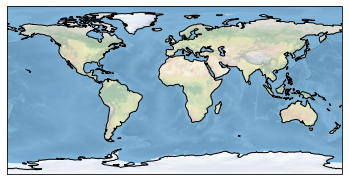

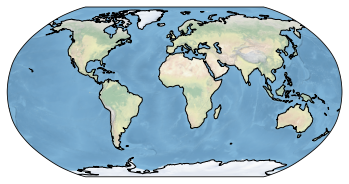

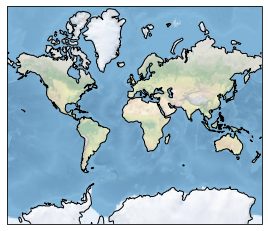

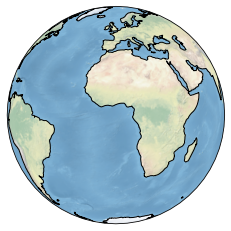

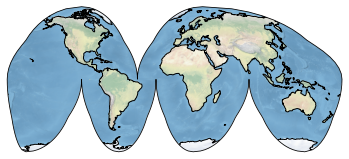

In [6]:
# Available maps

projections = [cartopy.crs.PlateCarree(),
               cartopy.crs.Robinson(),
               cartopy.crs.Mercator(),
               cartopy.crs.Orthographic(),
               cartopy.crs.InterruptedGoodeHomolosine()
              ]


for proj in projections:
    plt.figure()
    ax = plt.axes(projection=proj)
    ax.stock_img()
    ax.coastlines()


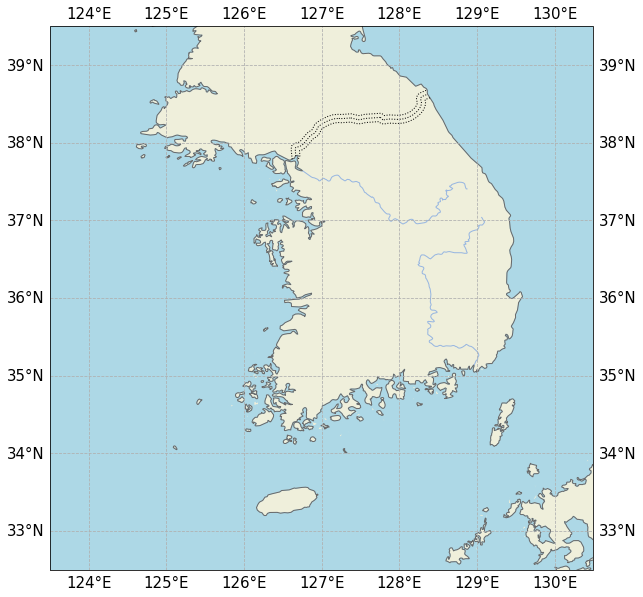

In [7]:
# Extracting from version 1: Korea

plt.figure(figsize=(10,10))
ax = plt.axes(projection=cartopy.crs.PlateCarree())

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN, facecolor='lightblue')
ax.add_feature(cartopy.feature.COASTLINE, edgecolor='dimgray')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon1, lon2, lat1, lat2 = 123.5, 130.5, 32.5, 39.5
ax.set_extent([lon1, lon2, lat1, lat2], crs=cartopy.crs.PlateCarree())
gl = ax.gridlines(draw_labels=True, crs=cartopy.crs.PlateCarree(), linestyle='--')
gl.xlabel_style = {'size': 15}
gl.ylabel_style = {'size': 15}

plt.show()


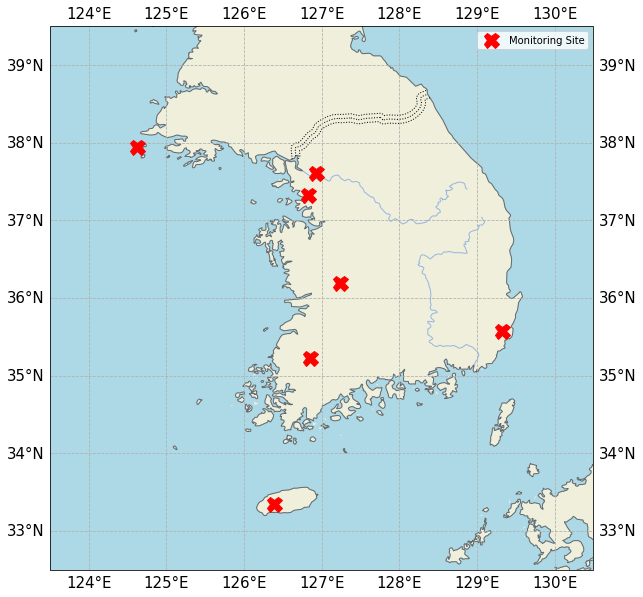

In [8]:
# Extracting from version 1: Korea
# Add points

plt.figure(figsize=(10,10))
ax = plt.axes(projection=cartopy.crs.PlateCarree())

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN, facecolor='lightblue')
ax.add_feature(cartopy.feature.COASTLINE, edgecolor='dimgray')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon1, lon2, lat1, lat2 = 123.5, 130.5, 32.5, 39.5
ax.set_extent([lon1, lon2, lat1, lat2], crs=cartopy.crs.PlateCarree())
gl = ax.gridlines(draw_labels=True, crs=cartopy.crs.PlateCarree(), linestyle='--')
gl.xlabel_style = {'size': 15}
gl.ylabel_style = {'size': 15}

monitoring = [['수도권', 37.6105, 126.9336, 40],
              ['백령도', 37.950, 124.617, 15],
              ['중부권', 36.19, 127.24, 30],
              ['호남권', 35.2269, 126.8490, 20],
              ['영남권', 35.5812, 129.3242, 10],
              ['제주도', 33.3469, 126.3882, 15],
              ['경기권', 37.3202, 126.8283, 30]]


monitoring = pd.DataFrame(monitoring)

plt.plot(monitoring[2], monitoring[1], color='red', marker='X',
         linestyle='None', markersize=15, label='Monitoring Site')

plt.legend()
plt.show()



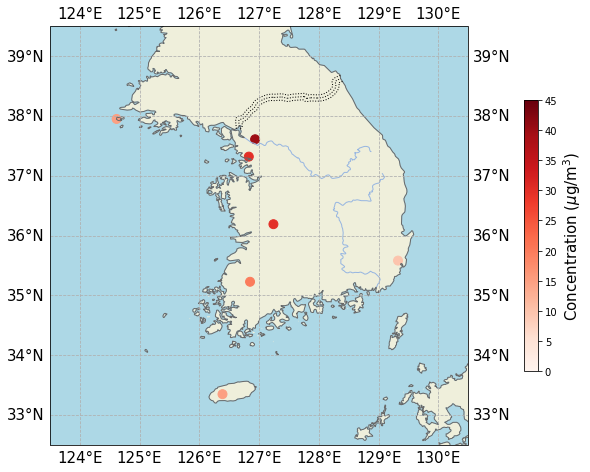

In [9]:
# Extracting from version 1: Korea
# Add points with concentrations

plt.figure(figsize=(10,10))
ax = plt.axes(projection=cartopy.crs.PlateCarree())

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN, facecolor='lightblue')
ax.add_feature(cartopy.feature.COASTLINE, edgecolor='dimgray')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon1, lon2, lat1, lat2 = 123.5, 130.5, 32.5, 39.5
ax.set_extent([lon1, lon2, lat1, lat2], crs=cartopy.crs.PlateCarree())
gl = ax.gridlines(draw_labels=True, crs=cartopy.crs.PlateCarree(), linestyle='--')
gl.xlabel_style = {'size': 15}
gl.ylabel_style = {'size': 15}


monitoring = [['수도권', 37.6105, 126.9336, 40],
              ['백령도', 37.950, 124.617, 15],
              ['중부권', 36.19, 127.24, 30],
              ['호남권', 35.2269, 126.8490, 20],
              ['영남권', 35.5812, 129.3242, 10],
              ['제주도', 33.3469, 126.3882, 15],
              ['경기권', 37.3202, 126.8283, 30]]

monitoring = pd.DataFrame(monitoring)


points = plt.scatter(monitoring[2], monitoring[1], c=monitoring[3],
                      vmin=0, vmax=45,
                      cmap='Reds', s=80)
cb = plt.colorbar(points, orientation='vertical', ticklocation='auto', shrink=0.5, pad=0.1)

cb.set_label(label='Concentration (' + "${\mu}$" + 'g/m' + r'$^3$' + ')', size=15)

plt.show()



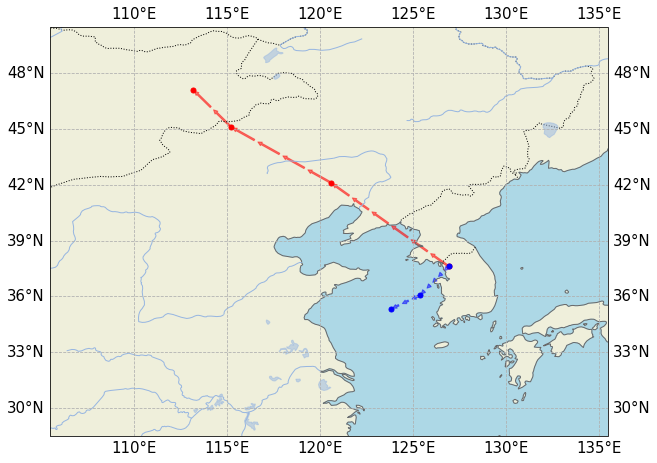

In [13]:
# Highlight: Trajectory mapping

# From Googling

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def arrowplot(axes, x, y, nArrs=30, mutateSize=10, color='gray', markerStyle='o'): 
    '''arrowplot : plots arrows along a path on a set of axes
        axes   :  the axes the path will be plotted on
        x      :  list of x coordinates of points defining path
        y      :  list of y coordinates of points defining path
        nArrs  :  Number of arrows that will be drawn along the path
        mutateSize :  Size parameter for arrows
        color  :  color of the edge and face of the arrow head
        markerStyle : Symbol
    
        Bugs: If a path is straight vertical, the matplotlab FanceArrowPatch bombs out.
          My kludge is to test for a vertical path, and perturb the second x value
          by 0.1 pixel. The original x & y arrays are not changed
    
        MHuster 2016, based on code by 
    '''
    # recast the data into numpy arrays
    x = np.array(x, dtype='f')
    y = np.array(y, dtype='f')
    nPts = len(x)

    # Plot the points first to set up the display coordinates
    axes.plot(x,y, markerStyle, ms=5, color=color)

    # get inverse coord transform
    inv = axes.transData.inverted()

    # transform x & y into display coordinates
    # Variable with a 'D' at the end are in display coordinates
    xyDisp = np.array(axes.transData.transform(list(zip(x,y))))
    xD = xyDisp[:,0]
    yD = xyDisp[:,1]

    # drD is the distance spanned between pairs of points
    # in display coordinates
    dxD = xD[1:] - xD[:-1]
    dyD = yD[1:] - yD[:-1]
    drD = np.sqrt(dxD**2 + dyD**2)

    # Compensating for matplotlib bug
    dxD[np.where(dxD==0.0)] = 0.1


    # rtotS is the total path length
    rtotD = np.sum(drD)

    # based on nArrs, set the nominal arrow spacing
    arrSpaceD = rtotD / nArrs

    # Loop over the path segments
    iSeg = 0
    while iSeg < nPts - 1:
        # Figure out how many arrows in this segment.
        # Plot at least one.
        nArrSeg = max(1, int(drD[iSeg] / arrSpaceD + 0.5))
        xArr = (dxD[iSeg]) / nArrSeg # x size of each arrow
        segSlope = dyD[iSeg] / dxD[iSeg]
        # Get display coordinates of first arrow in segment
        xBeg = xD[iSeg]
        xEnd = xBeg + xArr
        yBeg = yD[iSeg]
        yEnd = yBeg + segSlope * xArr
        # Now loop over the arrows in this segment
        for iArr in range(nArrSeg):
            # Transform the oints back to data coordinates
            xyData = inv.transform(((xBeg, yBeg),(xEnd,yEnd)))
            # Use a patch to draw the arrow
            # I draw the arrows with an alpha of 0.5
            p = patches.FancyArrowPatch( 
                xyData[0], xyData[1], 
                arrowstyle='simple',
                mutation_scale=mutateSize,
                color=color, alpha=0.5)
            axes.add_patch(p)
            # Increment to the next arrow
            xBeg = xEnd
            xEnd += xArr
            yBeg = yEnd
            yEnd += segSlope * xArr
        # Increment segment number
        iSeg += 1


plt.figure(figsize=(10,10))
ax = plt.axes(projection=cartopy.crs.PlateCarree())

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN, facecolor='lightblue')
ax.add_feature(cartopy.feature.COASTLINE, edgecolor='dimgray')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon1, lon2, lat1, lat2 = 105.5, 135.5, 28.5, 50.5
ax.set_extent([lon1, lon2, lat1, lat2], crs=cartopy.crs.PlateCarree())
gl = ax.gridlines(draw_labels=True, crs=cartopy.crs.PlateCarree(), linestyle='--')
gl.xlabel_style = {'size': 15}
gl.ylabel_style = {'size': 15}

# Adding trajectories

traj = [['traj1', 1, 37.6105, 126.9336],
        ['traj1', 2, 42.1, 120.617],
        ['traj1', 3, 45.1, 115.24],
        ['traj1', 4, 47.1, 113.2],
        ['traj2', 1, 37.6105, 126.9336],
        ['traj2', 2, 36.05, 125.3882],
        ['traj2', 3, 35.3202, 123.8283]]

traj = pd.DataFrame(traj)
traj.columns = ['Traj No.', 'No.' , 'lat', 'lon']

x, y = traj.loc[traj['Traj No.']=='traj1']['lon'], traj.loc[traj['Traj No.']=='traj1']['lat']
arrowplot(ax, x, y, nArrs=4*(len(x)-1), mutateSize=8, color='red')
x, y = traj.loc[traj['Traj No.']=='traj2']['lon'], traj.loc[traj['Traj No.']=='traj2']['lat']
arrowplot(ax, x, y, nArrs=4*(len(x)-1), mutateSize=8, color='blue')

plt.show()
